# Diabetes

- This is a classification model to test whether a patient is diabetic or not.

In [1]:
# General Libraries
import joblib
import numpy as np
import pandas as pd 
from pandas_profiling import ProfileReport

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data splitting
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
# Data Loading
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Check Statistics
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Cleaning & Feature Engineering

In [5]:
# Check for duplicates
diabetes_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [6]:
diabetes_data.isnull().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [7]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [29]:
# report = ProfileReport(diabetes_data)
# report.to_widgets()


In [33]:
# Explore data
#sns.pairplot(diabetes_data, hue='Outcome')

<AxesSubplot:>

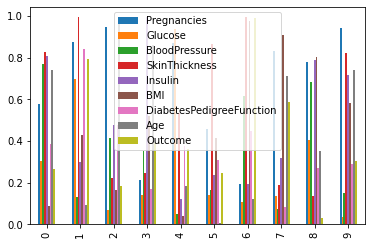

In [8]:
diabetes_data1 = pd.DataFrame(np.random.rand(10, 9), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
diabetes_data1.plot.bar()


In [9]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
# Drop unnecessary columns
to_drop = ['SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
diabetes_clean = diabetes_data.drop(to_drop, axis=1)

In [11]:
# Create new dataset
diabetes_classification = diabetes_clean.copy()

In [12]:
diabetes_classification.head()

,Pregnancies,Glucose,BloodPressure,Age,Outcome
0,6,148,72,50,1
1,1,85,66,31,0
2,8,183,64,32,1
3,1,89,66,21,0
4,0,137,40,33,1


In [15]:
# Train data
X = diabetes_classification.drop('Outcome', axis=1)
y = diabetes_classification['Outcome']

# Split Data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Modelling

In [18]:
# Instantiate models
svc = SVC()
decision_tree = DecisionTreeClassifier()
models = [svc, decision_tree]


In [20]:
# Train model

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
print(f'This {model} has an accuracy of {accuracy}')


This DecisionTreeClassifier() has an accuracy of 0.6666666666666666


In [21]:
# Save the svc model
joblib.dump(svc, 'diabetes_model1.pkl')

['diabetes_model1.pkl']

In [29]:
X_test.iloc[1]

Pregnancies        2
Glucose          112
BloodPressure     75
Age               21
Name: 324, dtype: int64

In [27]:
y_test.iloc[1]

0